# Práctica 3

## Laboratorio 3: Algoritmos Cuánticos I

### 1. Codifica una función llamada `teleportacion` que cumpla con lo siguiente:

   1. Reciba parámetros para preparar el estado a ser teleportado.
   2. Reciba otro parámetro que indique que estado de Bell se debe usar para entrelazar los qubits de Alicia y de Bob. Preparar el estado de Bell correspondiente.
   3. Aplique las compuertas correctas en la decodificación dependiendo del estado de Bell indicado como parámetro.
   4. Muestre el circuito creado con el protocolo de Teleportación completo con los parámetros provistos.
      - Recuerda que puedes usar la función `display` para que el `.draw()` del circuito se vea (hay ejemplos de esto en los notebooks).
   5. Muestre una esfera de Bloch con el estado a ser enviado (usar función `display`). El estado lo puedes obtener con `Statevector` (ver Lab1).
   6. Muestre otra esfera de Bloch que muestre el estado teleportado (usar función `display`). El estado lo puedes obtener con `Statevector` (ver Lab1).
   7. **[Opcional]** Simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab3).
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
      - Puedes mostrar el histograma como en el ejemplo de este mismo notebook para comprobar los resultados a través de la simulación.

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Función para crear los estados de Bell
def crear_estado_bell(circuit, qubit_a, qubit_b, tipo_bell=0):
    if tipo_bell == 0:
        # Estado |Φ+⟩
        circuit.h(qubit_a)
        circuit.cx(qubit_a, qubit_b)
    elif tipo_bell == 1:
        # Estado |Φ-⟩
        circuit.h(qubit_a)
        circuit.cx(qubit_a, qubit_b)
        circuit.z(qubit_a)
    elif tipo_bell == 2:
        # Estado |Ψ+⟩
        circuit.h(qubit_a)
        circuit.cx(qubit_a, qubit_b)
        circuit.x(qubit_a)
    elif tipo_bell == 3:
        # Estado |Ψ-⟩
        circuit.h(qubit_a)
        circuit.cx(qubit_a, qubit_b)
        circuit.z(qubit_a)
        circuit.x(qubit_a)

# Compuertas aplicadas de Alicia
def compuertas_alicia(circuit, qubit_alicia0, qubit_alicia1):
    circuit.cx(qubit_alicia0, qubit_alicia1)
    circuit.h(qubit_alicia0)

# Compuertas aplicadas de Bob
def aplicar_correcciones_bob(circuit, qubit_bob, resultado_alicia):
    if resultado_alicia == '01':
        circuit.x(qubit_bob)  # X si el primer bit es 1
    elif resultado_alicia == '10':
        circuit.z(qubit_bob)  # Z si el segundo bit es 1
    elif resultado_alicia == '11':
        circuit.x(qubit_bob)
        circuit.z(qubit_bob)  # X y Z si ambos bits son 1

# Función de teleportación
def teleportacion(theta, phi, lam, tipo_bell=0, resultado_alicia='00'):
    # Registros cuánticos y clásicos
    qr_alicia = QuantumRegister(2, name="alicia")  # dos qubits de Alicia
    qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
    circuito_teleportacion = QuantumCircuit(qr_alicia, qr_bob)

    # Paso 0: Iniciar el qubit de Alicia con el estado a enviar
    circuito_teleportacion.u(theta, phi, lam, qr_alicia[0])
    state_a_enviar = Statevector.from_instruction(circuito_teleportacion)
    print("Estado a ser teleportado:")
    display(plot_bloch_multivector(state_a_enviar))  # Esfera de Bloch del estado inicial
    circuito_teleportacion.barrier()

    # Paso 1: Crear el estado de Bell entrelazado
    crear_estado_bell(circuito_teleportacion, qr_alicia[1], qr_bob[0], tipo_bell)

    # Paso 2: Aplicar las compuertas de Alicia
    compuertas_alicia(circuito_teleportacion, qr_alicia[0], qr_alicia[1])

    # Paso 3: Aplicar las correcciones en Bob basadas en los bits medidos simulados
    aplicar_correcciones_bob(circuito_teleportacion, qr_bob[0], resultado_alicia)

    # Circuito final
    print("Circuito de teleportación:")
    display(circuito_teleportacion.draw('mpl'))

    # Estado final después de la teleportación
    state_final = Statevector.from_instruction(circuito_teleportacion)

    print("Estado teleportado (qubit de Bob):")
    display(plot_bloch_multivector(state_final))  # Esfera de Bloch

Estado a ser teleportado:


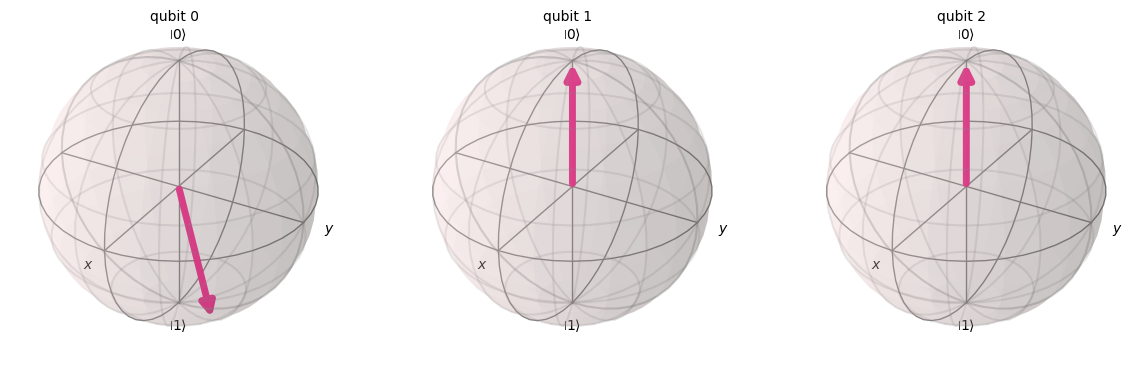

Circuito de teleportación:


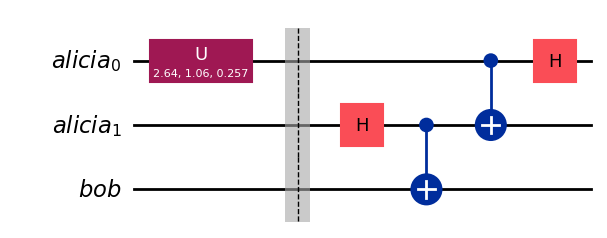

Estado teleportado (qubit de Bob):


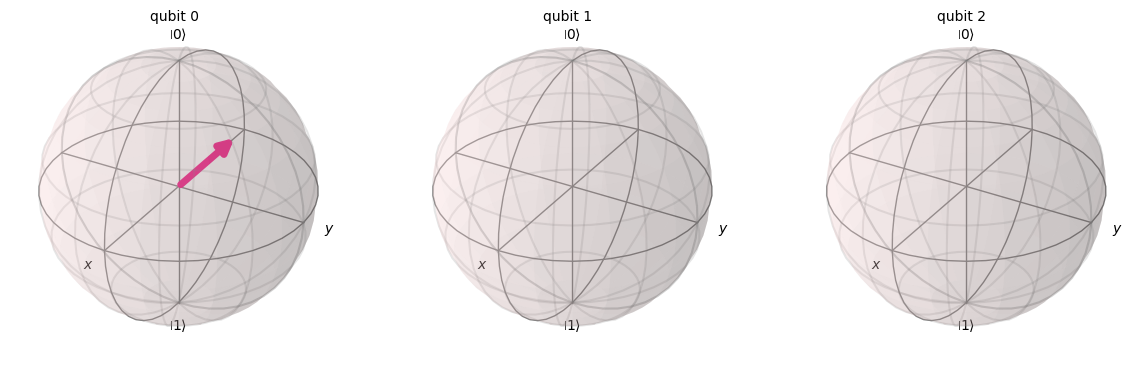

In [27]:
import numpy as np
from math import pi

# Ejemplo
theta = np.random.rand() * pi  # ángulo aleatorio
phi = np.random.rand() * pi
lam = np.random.rand() * pi

# Teleportar usando el estado de Bell |Φ+⟩
teleportacion(theta, phi, lam, tipo_bell=0, resultado_alicia='00')

 2. #### Implementa el protocolo de codificación superdensa usando el paquete `spinqit` y simúlalo
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - El protocolo de codificación superdensa está completo en este mismo notebook (Lab3), solo hay que escribirlo ahora en `spinqit`.
    3. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 2 en el mismo notebook en el que están los resultados del ejercicio 1.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 2 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

</br>

[Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1, 0], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1, 0], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[]), Instruction(gate:MEASURE, qubits:[0, 1], clbits:[0, 1], params:[])]

{'00': 256, '01': 256, '10': 256, '11': 256}
{'00': 0.24999999998097527, '01': 0.24999999998097527, '10': 0.24999999998097527, '11': 0.24999999998097527}
[]



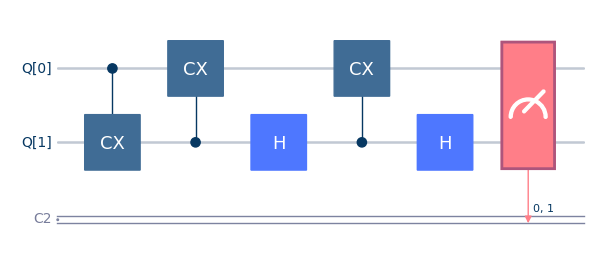

In [24]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, H, CX, draw
from spinqit.utils import print_circuit

def codificar_mensaje(circuit, qubit, mensaje):
    # Codificar el mensaje en el qubit especificado
    if mensaje[0] == '1':
        circuit << (H, qubit)  # H si el primer bit es 1
    if mensaje[1] == '1':
        circuit << (CX, (qubit, (qubit + 1) % 2))  # CNOT si el segundo bit es 1
    return circuit

def decodificar_mensaje(circuit):
    circuit << (CX, (1, 0))  # CNOT
    circuit << (H, 1)        # Hadamard
    return circuit

# Crear el circuito para el protocolo
qc = Circuit()
q = qc.allocateQubits(2)   # 2 qubits

# Carlos crea un par entrelazado entre Alicia y Bob
qc << (CX, (q[0], q[1]))  # Aplicar CNOT para entrelazado
qc << (CX, (q[1], q[0]))  # Aplicar CNOT nuevamente

# Mensaje que quiere enviar Alicia
mensaje = '10'  # Valor de ejemplo
qc = codificar_mensaje(qc, 1, mensaje)  # Alicia codifica su mensaje

# Decodificar el mensaje en Bob
qc = decodificar_mensaje(qc)

# Crear registros de bits clásicos para almacenar las mediciones
clbits = qc.allocateClbits(2)

# Medir los qubits y almacenar los resultados en los bits clásicos
qc.measure(q, clbits)

# Mostrar el circuito
print(print_circuit(qc))
print()

# Simulación
comp = get_compiler()
engine = get_basic_simulator()

# Compilar el circuito
exe = comp.compile(qc, 0)
draw(exe)

# Configurar la simulación
config = BasicSimulatorConfig()
config.configure_shots(1024)

# Ejecutar la simulación
result = engine.execute(exe, config)

# Mostrar los resultados
print(result.counts)
print(result.probabilities)
print(result.states)
print()


3. ### **[Opcional]** Codifica los 4 estados de Bell en `spinqit` y simúlalos
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - Los estados de Bell y sus circuitos están en el notebook del Lab2.
    3. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 3 en el mismo notebook en el que están los resultados de los ejercicios 1 y 2.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 3 (junto con el ejercicio 2) en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

Circuito para el estado de Bell |00>:
[Instruction(gate:H, qubits:[0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:MEASURE, qubits:[0, 1], clbits:[0, 1], params:[])]

Resultados para el estado de Bell |00>:
{'00': 512, '11': 512}
{'00': 0.4999999999809753, '11': 0.4999999999809753}
[]

Circuito para el estado de Bell |01>:
[Instruction(gate:H, qubits:[0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[]), Instruction(gate:MEASURE, qubits:[0, 1], clbits:[0, 1], params:[])]

Resultados para el estado de Bell |01>:
{'00': 256, '01': 256, '10': 256, '11': 256}
{'00': 0.24999999998097527, '01': 0.24999999998097527, '10': 0.24999999998097527, '11': 0.24999999998097527}
[]

Circuito para el estado de Bell |10>:
[Instruction(gate:H, qubits:[0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1

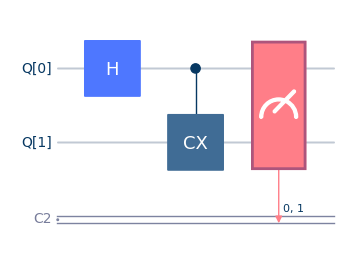

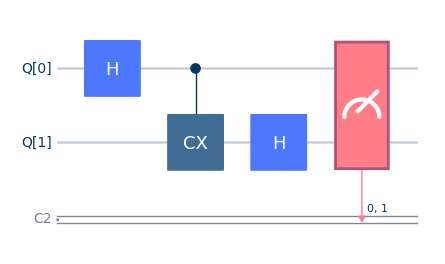

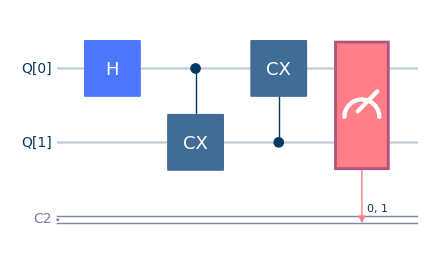

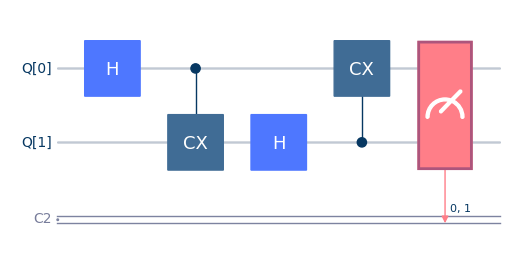

In [34]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, H, CX, draw
from spinqit.utils import print_circuit

# Función para crear los estados de Bell
def crear_estado_bell(circuit, estado):
    if estado == '00':
        circuit << (H, 0)   # H al primer qubit
        circuit << (CX, (0, 1))  # CNOT
    elif estado == '01':
        circuit << (H, 0)   # H al primer qubit
        circuit << (CX, (0, 1))  # CNOT
        circuit << (H, 1)   # H al segundo qubit
    elif estado == '10':
        circuit << (H, 0)   # H al primer qubit
        circuit << (CX, (0, 1))  # CNOT
        circuit << (CX, (1, 0))  # CNOT
    elif estado == '11':
        circuit << (H, 0)   # H al primer qubit
        circuit << (CX, (0, 1))  # CNOT
        circuit << (H, 1)   # H al segundo qubit
        circuit << (CX, (1, 0))  # CNOT

estados_bell = ['00', '01', '10', '11']

# Simulación para cada estado de Bell
for estado in estados_bell:
    qc = Circuit()
    q = qc.allocateQubits(2)  # 2 qubits

    # Crear el estado de Bell correspondiente
    crear_estado_bell(qc, estado)

    # Crear registros de bits clásicos para almacenar las mediciones
    clbits = qc.allocateClbits(2)

    # Medir los qubits y almacenar los resultados en los bits clásicos
    qc.measure(q, clbits)

   # Simulación para cada estado de Bell
for estado in estados_bell:
    qc = Circuit()
    q = qc.allocateQubits(2)  # 2 qubits

    # Crear el estado de Bell correspondiente
    crear_estado_bell(qc, estado)

    # Crear registros de bits clásicos para almacenar las mediciones
    clbits = qc.allocateClbits(2)

    # Medir los qubits y almacenar los resultados en los bits clásicos
    qc.measure(q, clbits)

    # Mostrar el circuito
    print(f"Circuito para el estado de Bell |{estado}>:")
    print(print_circuit(qc))
    print()

    # Simulación
    comp = get_compiler()
    engine = get_basic_simulator()

    # Compilar el circuito
    exe = comp.compile(qc, 0)
    draw(exe)

    # Configurar la simulación
    config = BasicSimulatorConfig()
    config.configure_shots(1024)

    # Ejecutar la simulación
    result = engine.execute(exe, config)

    # Mostrar los resultados
    print(f"Resultados para el estado de Bell |{estado}>:")
    print(result.counts)
    print(result.probabilities)
    print(result.states)
    print()